In [1]:
#Importing all the libraries and modules
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [2]:
df=pd.read_csv(r"/home/pi/mausam/mausam-main/models/Final Datasets/nTemperature.csv")

In [3]:
print(df.shape)
print(df.describe())
print(df.head())
print(df.columns)
df.drop(["Time"],axis=1,inplace=True)

(100990, 9)
                Date          Month           Hour     heatindex  \
count  100990.000000  100990.000000  100990.000000  29155.000000   
mean       15.690049       6.579344      10.928844     35.651710   
std         8.769718       3.475841       6.854328      5.015384   
min         1.000000       1.000000       0.000000     26.800000   
25%         8.000000       4.000000       5.000000     31.700000   
50%        16.000000       7.000000      11.000000     35.100000   
75%        23.000000      10.000000      17.000000     39.200000   
max        31.000000      12.000000      23.000000     73.600000   

            humidity           rain           temp  temp previous  
count  100233.000000  100990.000000  100317.000000  100317.000000  
mean       57.909481       0.026260      25.451260      25.451269  
std        23.807771       0.159908       8.482854       8.482859  
min         4.000000       0.000000       1.000000       1.000000  
25%        39.000000       0.000000

# Preprocessing the data

In [4]:
print(df.isnull().any())

Date             False
Month            False
Hour             False
heatindex         True
humidity          True
rain             False
temp              True
temp previous     True
dtype: bool


In [5]:
# Temperature Previous

def replace(j):
    if df["temp previous"][j]!=(-10):
        return df["temp previous"][j]
    else:
        return replace(j+1)
        
df["temp previous"].fillna(-10, inplace = True)

for i in range(100990):
    if df["temp previous"][i]==-10:
        df["temp previous"][i]=(replace(i+1)+df["temp previous"][i-1])/2
    elif df["temp previous"][i]>=50:
        df["temp previous"][i]=(df["temp previous"][i-1]+df["temp previous"][i+1])/2
        

In [6]:
print(df["temp previous"].isnull().any())
df["temp previous"][124]

False


15.5

In [7]:
# Temperature

print(df["temp"].isnull().any())

df["temp"].fillna(-300, inplace = True)

for i in range(100990):
    if df["temp"][i]==-300:
        df["temp"][i]=df["temp previous"][i+1]
    elif df["temp"][i]>100:
        df["temp"][i]=df["temp previous"][i+1]


True


In [8]:
print(df["temp"].isnull().any())
df["temp"][123]

False


15.5

In [9]:
# Humidity

df["humidity"].fillna(-100, inplace = True)

print(df["humidity"].isnull().any())

def replace(j):
    if df["humidity"][j]!=(-100):
        return df["humidity"][j]
    else:
        return replace(j+1)

for i in range(100990):
    if df["humidity"][i]==-100:
        df["humidity"][i]=(replace(i+1)+df["humidity"][i-1])/2
    elif df["humidity"][i]>100:
        df["humidity"][i]=(df["humidity"][i-1]+df["humidity"][i+1])/2
        

False


In [10]:
df["humidity"][124]

59.0

In [11]:
# Heat Index

#This is the function for calculating heat index
def HI(t,H):
    c1 = -42.379
    c2= 2.04901523
    c3 = 10.14333127
    c4 = -0.22475541
    c5 = -6.83783 *(0.001)
    c6 = -5.481717 * (0.01)
    c7 = 1.22874 * (0.001)
    c8 = 8.5282 * (0.0001)
    c9 = -1.99 * (0.000001)
    T=(1.8*t)+32
    HI=c1+(c2*T)+(c3*H)+(c4*T*H)+(c5*T*T)+(c6*H*H)+(c7*T*H*T)+(c8*T*H*H)+(c9*T*H*T*H)
    FHI=((HI-32)*5)/9
    return FHI

df["heatindex"].fillna(-200, inplace = True)


for i in range(100990):
    if df["heatindex"][i]==-200:
        df["heatindex"][i]=HI(df["temp previous"][i],df["humidity"][i])
    elif df["heatindex"][i]>60:
        df["heatindex"][i]=HI(df["temp previous"][i],df["humidity"][i])
        
    

In [12]:
print(df["heatindex"][124])

27.90896452244449


In [14]:
weather_df_num=df[list(df.dtypes[df.dtypes!='object'].index)]
weather_y=weather_df_num.pop('temp')
weather_x=weather_df_num
print(df.isnull().any())

Date             False
Month            False
Hour             False
heatindex        False
humidity         False
rain             False
temp             False
temp previous    False
dtype: bool


In [15]:
train_x,test_x,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)
train_x.head()

,Date,Month,Hour,heatindex,humidity,rain,temp previous
99686,6,1,15,15.316544,96.0,0,18.0
18305,29,1,10,24.825667,35.0,0,21.0
91877,20,8,6,36.195542,57.0,0,32.0
55714,29,2,14,25.389065,47.0,0,24.0
40664,2,2,7,21.773657,82.0,0,16.0


In [16]:
#First Model Linear Regression
tlrmodel = LinearRegression()
tlrmodel.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print(test_x)
prediction=tlrmodel.predict(test_x)
#Calculating error
np.mean((prediction-test_y)**2)

       Date  Month  Hour  heatindex  humidity  rain  temp previous
16733    18     11     8  26.768215      21.0     0           28.0
82934    21      4    15  28.553710      27.0     0           30.0
33831    11      4    13  32.450585      13.0     0           35.0
22660    14     12    19  25.969198      77.0     0           14.0
47063    16      8    14  33.600000      89.0     0           28.0
...     ...    ...   ...        ...       ...   ...            ...
26343    24      5     8  44.400000      21.0     0           43.0
10264    12      9    22  25.540468      94.0     0           25.0
17753     4      1    15  26.601143      88.0     0           11.0
98956     2     12    12  23.190211      73.0     0           22.0
46164    26      7    23  34.500000      79.0     0           29.0

[20198 rows x 7 columns]


5.4107202618832515

In [18]:
l=[6,7,18,43,65,1,33]
x=np.array(l).reshape(1,-1)
print(x.shape)
prediction=tlrmodel.predict(test_x)
print(prediction,tlrmodel.predict(x))

(1, 7)
[27.67444428 28.63836648 33.58768702 ... 11.28601438 22.18737737
 27.29846139] [31.17680504]


In [19]:
pd.DataFrame({'actual':test_y,'prediction':prediction,'diff':(test_y-prediction)})

,actual,prediction,diff
16733,28.0,27.674444,0.325556
82934,27.0,28.638366,-1.638366
33831,32.0,33.587687,-1.587687
22660,14.0,13.201690,0.798310
47063,28.0,28.051453,-0.051453
...,...,...,...
26343,43.0,42.379087,0.620913
10264,25.0,23.880131,1.119869
17753,10.0,11.286014,-1.286014
98956,19.0,22.187377,-3.187377


In [20]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(tlrmodel, 'nTLinearRegression.pkl') 
  
# Load the model from the file only to be uncommented when to be used 
#LR = joblib.load('TLinearRegression.pkl')  
  
# Use the loaded model to make predictions 
#LR.predict(X_test)

['nTLinearRegression.pkl']

In [21]:
test_x

,Date,Month,Hour,heatindex,humidity,rain,temp previous
16733,18,11,8,26.768215,21.0,0,28.0
82934,21,4,15,28.553710,27.0,0,30.0
33831,11,4,13,32.450585,13.0,0,35.0
22660,14,12,19,25.969198,77.0,0,14.0
47063,16,8,14,33.600000,89.0,0,28.0
...,...,...,...,...,...,...,...
26343,24,5,8,44.400000,21.0,0,43.0
10264,12,9,22,25.540468,94.0,0,25.0
17753,4,1,15,26.601143,88.0,0,11.0
98956,2,12,12,23.190211,73.0,0,22.0


In [22]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)

In [23]:
x_poly=poly.fit_transform(train_x)
lin2=LinearRegression()
poly.fit(x_poly,train_y)
lin2.fit(x_poly,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
prediction2 = lin2.predict(poly.fit_transform(test_x))
#Calculating the error
np.mean((prediction2-test_y)**2)

3.6012801200626168

In [26]:
pd.DataFrame({'actual':test_y,'prediction':prediction2,'diff':(test_y-prediction2)})

,actual,prediction,diff
16733,28.0,26.890418,1.109582
82934,27.0,27.621160,-0.621160
33831,32.0,31.582420,0.417580
22660,14.0,12.875534,1.124466
47063,28.0,27.285693,0.714307
...,...,...,...
26343,43.0,42.850979,0.149021
10264,25.0,25.063772,-0.063772
17753,10.0,9.513604,0.486396
98956,19.0,19.624309,-0.624309


In [27]:
#Saving the Polynomial Regression Model
from sklearn.externals import joblib 
joblib.dump(poly, 'nTPoly.pkl') 
joblib.dump(lin2, 'nTPolynomialRegression.pkl') 
  
# Load the model from the file only to be uncommented when to be used 
#PR = joblib.load('PRTP.pkl')  
  
# Use the loaded model to make predictions 
#PR.predict(X_test)

['nTPolynomialRegression.pkl']

In [28]:
#Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(train_x,train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [29]:
prediction3=regressor.predict(test_x)
print(np.mean((prediction3-test_y)**2))
dt=np.array([6,7,18,43,65,1,33]).reshape(1,-1)
print(regressor.predict(dt))

5.341675485609135
[36.]


In [30]:
pd.DataFrame({'actual':test_y,'prediction':prediction3,'diff':(test_y-prediction3)})

,actual,prediction,diff
16733,28.0,28.0,0.0
82934,27.0,31.0,-4.0
33831,32.0,33.0,-1.0
22660,14.0,14.0,0.0
47063,28.0,28.0,0.0
...,...,...,...
26343,43.0,43.0,0.0
10264,25.0,25.0,0.0
17753,10.0,10.5,-0.5
98956,19.0,21.0,-2.0


In [31]:
#Saving the Decision Tree
joblib.dump(regressor, 'nTDecisionTree.pkl') 

# Load the model from the file only to be uncommented when to be used 
#DT = joblib.load('TDecision.pkl')  
  
# Use the loaded model to make predictions 
#DT.predict(X_test)

['nTDecisionTree.pkl']

In [32]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=60,random_state=0,n_estimators=100)
regr.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [33]:
prediction4=regr.predict(test_x)
np.mean((prediction4-test_y)**2)

3.1968962072291185

In [34]:
regr.predict(dt)

array([32.47])

In [35]:
pd.DataFrame({'actual':test_y,'prediction':prediction4,'diff':(test_y-prediction4)})

,actual,prediction,diff
16733,28.0,28.150000,-0.150000
82934,27.0,28.820000,-1.820000
33831,32.0,33.060000,-1.060000
22660,14.0,13.365000,0.635000
47063,28.0,27.830000,0.170000
...,...,...,...
26343,43.0,42.680000,0.320000
10264,25.0,24.990000,0.010000
17753,10.0,10.625167,-0.625167
98956,19.0,20.530000,-1.530000


In [36]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(regr, 'nTRandomForest.pkl') 
  
# Load the model from the file only to be uncommented when to be used 
#RF = joblib.load('TRandomForest.pkl')  
  
# Use the loaded model to make predictions 
#TEMP.predict(X_test)

['nTRandomForest.pkl']

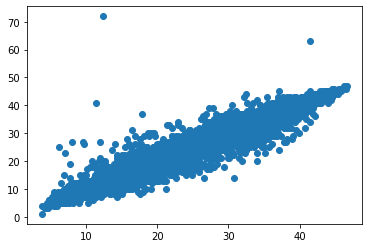

In [37]:
plt.scatter(prediction4,test_y)

In [38]:
from datetime import datetime
datetime.today()
date=datetime.now()


In [39]:
D=date.day
H=date.hour
M=date.month
print(D,H,M)

14 23 1


In [40]:
#For hourly, daily, weekly and min max temp details
L=[]
import random
D=date.day
H=date.hour
M=date.month
tp=33
for d in range(1,15):
    for h in range(1,25):
        para=np.array([D,M,H,48,45,0,tp]).reshape(1,-1)
        p=tlrmodel.predict(para)
        print(p,H,D,M)
        tp=list(p)[0]
        H+=1
        if H==24:
            H=0
            h=24
            D+=1
        if D==31:
            M+=1
            D=1
        


[30.53410527] 23 14 1
[32.0214874] 0 15 1
[33.31219596] 1 15 1
[34.40975993] 2 15 1
[35.31764493] 3 15 1
[36.03925442] 4 15 1
[36.57793079] 5 15 1
[36.93695643] 6 15 1
[37.11955488] 7 15 1
[37.12889179] 8 15 1
[36.96807604] 9 15 1
[36.64016072] 10 15 1
[36.14814413] 11 15 1
[35.49497077] 12 15 1
[34.68353233] 13 15 1
[33.71666858] 14 15 1
[32.59716835] 15 15 1
[31.32777045] 16 15 1
[29.9111645] 17 15 1
[28.34999191] 18 15 1
[26.64684666] 19 15 1
[24.8042762] 20 15 1
[22.82478227] 21 15 1
[20.71082171] 22 15 1
[18.4648073] 23 15 1
[20.16812437] 0 16 1
[21.67089331] 1 16 1
[22.97671261] 2 16 1
[24.08911617] 3 16 1
[25.0115745] 4 16 1
[25.74749583] 5 16 1
[26.30022723] 6 16 1
[26.67305572] 7 16 1
[26.86920934] 8 16 1
[26.8918582] 9 16 1
[26.74411554] 10 16 1
[26.42903874] 11 16 1
[25.9496303] 12 16 1
[25.30883887] 13 16 1
[24.50956017] 14 16 1
[23.55463799] 15 16 1
[22.44686506] 16 16 1
[21.18898403] 17 16 1
[19.7836883] 18 16 1
[18.23362299] 19 16 1
[16.54138572] 20 16 1
[14.70952751] 21

In [41]:
df["temp"].value_count()

AttributeError: 'Series' object has no attribute 'value_count'